## Harris, Modern Physics 2e, problem 5.99

**P99. Finite well.** The goal here is to find the energies for a finite well whose width L is 4 and whose depth U<sub>0</sub> is 5 in the simple system of units discussed above (set constants = 1). To exploit symmetry, assume that the finite well extends not from x = 0 to x = 4 but from x = -2 to x = 2. For U(x) the function

$$ 2.5\ \mathrm{sign} (x^2 - 4) + 2.5 $$

can be adapted to almost any computer.

(a) Plot this U(x).

(b) For $\Delta x$, use 0.001. Now, following the above guidelines on choosing $\psi(0)$ and $\psi(\Delta x)$, test both odd and even functions at different trial values of E by finding $\psi$ at all positive multiples of $\Delta x$ out to x = 4 and plotting the results. Note that because of the functions' symmetries, there is no need to plot negative values of x. Find four allowed energies.

(c) What tells you that an energy is correct?

(d) Using the definitions of k and alpha, the finite well quantization condition, given in equation (5-22), can be written

$$ 2 \cot \left(\frac{L \sqrt{2mE}}{\hbar} \right) = \sqrt{\frac{E}{U_0 - E}} - \sqrt{\frac{U_0 - E}{E}} $$

It cannot be solved exactly, but do your values satisfy it reasonably well?

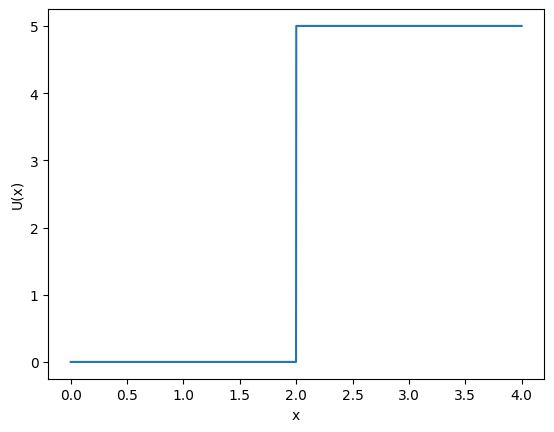

In [ ]:
# (a) Plot U(x) = 2.5 sign (x^2 - 4) + 2.5
# When x < 2 then U(x) = 0
# When x = 2 then U(x) = 2.5
# When x > 2 then U(x) = 5
# NOTE python's behavior: copysign(1, 0) = 1

# Variable list
# potential - list of values of potential
# x         - horizontal position

# import libraries
# usage: copysign(a, b) takes the value a and multiplies it by the sign of b
#        for example, copysign(2, -4) returns -2
#        copysign(2, 0) returns 0

import math
from matplotlib import pyplot as plt

def my_sign(x):
  return (x > 0) - (x < 0)

# initialize variables
potential = []
x = []
deltax = 0.001

# compute potential at every value of x
for i in range(0,4001):
  x.append(i*deltax)
  potential.append(2.5*my_sign(i*deltax*i*deltax - 4.) + 2.5)

# plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_xlim(1.99,2.01)
ax.set_xlabel('x')
ax.set_ylabel('U(x)')
ax.plot(x, potential)
plt.show()

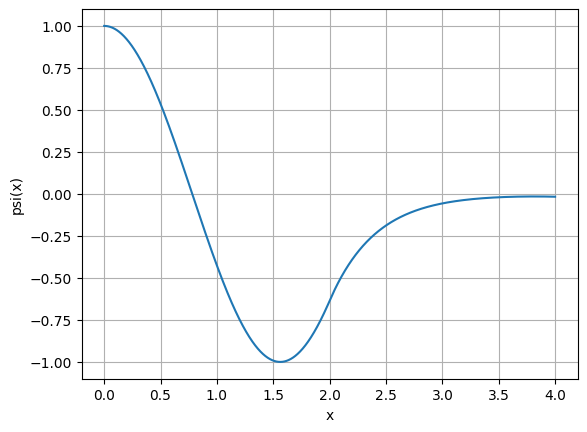

In [ ]:
# (b) Plot psi(x) for trial values of E. Finite well.

# import libraries
import math
from matplotlib import pyplot as plt

# initialize variables
# for odd functions choose psi[0] = 0 and psi[1] = 1, i.e., psi = [0,1]
# valid E = 0.91195, 3.502
# for even functions choose psi[0] = 1 and psi[1] = 1, i.e., psi = [1,1]
# valid E = 0.22967, 2.0246, 4.999 (difficult, slope almost zero at x=2)
potential = []
x = []
psi = [1.0, 1.0]
deltax = 0.001
E = 2.0246

# Fill the x and potential lists

for i in range(0,4001):
  x.append(i*deltax)
  potential.append(2.5*math.copysign(1, i*deltax*i*deltax - 4.) + 2.5)

# We chose the first two values for x and psi, so start the loop at i = 2.

for i in range(2,4001):
  psi.append(2.0*psi[i-1] - psi[i-2] + 2.0*deltax*deltax*psi[i-1]*(potential[i-1]-E))

# plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('psi(x)')
ax.plot(x, potential, label='Potential V(x)', linestyle='--')
ax.plot(x, psi)
plt.grid()
plt.show()

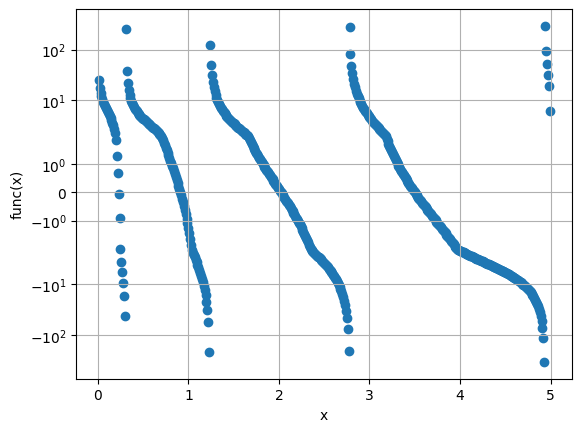

In [1]:
# (d) stupid little grapher
# the zeroes or "roots" are the valid, i.e., quantized energies in this problem
# can use the output for initial guesses in a root finder
# the math library does not have cotangent so must use 1/tan

import math
from matplotlib import pyplot as plt

x = []
func = []

# from the problem we set L=4 and U=5

def fn(E):
  return 2.0 / math.tan(4.0 * math.sqrt(2.0*E)) - math.sqrt(E / (5.0 - E)) + math.sqrt((5.0 - E) / E)

for i in range(1,500):
  x.append(i/100.)
  func.append(fn(i/100.))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('func(x)')
ax.set_yscale('symlog')
ax.scatter(x, func)
plt.grid()
plt.show()


In [ ]:
# (d) stupid little root finder
# approx answers from desmos graphing calculator: 0.229, 0.912, 2.023, 3.501, 4.993
# from this program: 0.229468, 0.911550, 2.023038, 3.500540, 4.993146

import math

def fn(E):
  return 2.0 / math.tan(4.0 * math.sqrt(2.0*E)) - math.sqrt(E / (5.0 - E)) + math.sqrt((5.0 - E) / E)

# set output = True if you want to see the iterations
output = False

# initial guess
E = 4.97
deltaE = 0.01
value1 = fn(E)
if output: print(E, value1)

for i in range(0,100):
  E = E + deltaE
  value2 = fn(E)
  if abs(value2) > abs(value1):
    deltaE = -deltaE / 2.0
  value1 = value2
  if output: print('{0:12.6f} {1:14.6e}'.format(E, value1))

print('{0:12.6f} {1:14.6e}'.format(E, value1))


    4.993146   5.575083e-10
